In [2]:
pip install nltk seaborn matplotlib wordcloud praw textblob asyncpraw textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.7 MB/s eta 0:00:00


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import praw
from textblob import TextBlob
from nltk.corpus import stopwords
import datetime
import asyncio
import nest_asyncio
from asyncpraw import Reddit
import string
import textstat
import pandas as pd
import networkx as nx


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
reddit = praw.Reddit(client_id='AMLc1UqBy5Ru8qsD67QiUw',
                     client_secret='4IBWWTyygs5NElpUuOgHHPmBvnY26A',
                     user_agent='DSMAScrapper 1.0 by /u/************** ')

In [6]:
# reddit = praw.Reddit(client_id='AMLc1UqBy5Ru8qsD67QiUw',
#                      client_secret='4IBWWTyygs5NElpUuOgHHPmBvnY26A',
#                      user_agent='DSMAScrapper 1.0 by /u/*******')

# Replace these values with your Reddit app credentials
reddit_client_id = 'AMLc1UqBy5Ru8qsD67QiUw'
reddit_client_secret = '4IBWWTyygs5NElpUuOgHHPmBvnY26A'
reddit_username = '**************'
reddit_password = '********'
reddit_user_agent = 'DSMAScrapper 1.0 by /u/********'

# Create a Reddit instance
reddit = praw.Reddit(client_id=reddit_client_id,
                     client_secret=reddit_client_secret,
                     username=reddit_username,
                     password=reddit_password,
                     user_agent=reddit_user_agent)

# Specify the subreddit you want to follow
subreddit_name = 'cocacola'

In [7]:
hot_posts = reddit.subreddit(subreddit_name).hot(limit=300)
for post in hot_posts:
    print(post.title)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Anyone know the process they use in Mexico? These are open exterior Vats of liquid. Is this sterile?
Which one did you like better Coca Cola Coffee and Coca Cola Energy?
Stock owner search
Salesman issues
Did this coca-cola artwork
Coca cola still uses coca leaves?
Why is my bottle smooth?
Coca-Cola Classic
Has this ever happened you?
So it begins. New logo in Switzerland
Why is the Fanta logo upside down but everything else is normal?
Help Plz: Lost my digital photos taken in world of cocacola atlanta
Coke Zero taste funny
Coke Slander
1983 Wolfpack
39 cokes in the mini fridge + one overflow
Is this satisfactory for y'all? It tasted like milk flavored chocolate syrup.
Help, I can’t find a Coca Cola game!
New Coca Cola Lemon for UK. With sugar and zero sugar
Screenshot from Markie_Devo on Instagram
Where is this from?
Does anyone know what this is or if it’s real
Anyone try and claim on this promo ?
🇲🇽 Coke and 🇺🇸 Coke
One of my favorite thrift store finds (ft. choccy milk)
Why was thi

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Pepsi and coke taste the same
Mexican Coke in the UK?
Pepsi is better than coke
Pepsi and Coke suddenly taste flat and tasteless???? (UK)
Coca-Cola in El Salvador
myCoke
Different tastes of cans of uk coke
Anyone have any info on the Coke Strawberry 🍓 Got it for Christmas from my Ex Wife. Banana & Duck for scale.
Fiarladyz box set coca Cola inno tiny
Anyone else have these cool glasses?
Zero Vanilla
COCACOLA NOS HA COMENTADFO UN POST | THE CHECHO GP
First pair of Crocs
Pepsi is not good
Coca Cola SouthWest Beverages Career/ Merchandiser
Pepsi is not it😂
Best coca-cola?
They are holding on😂
Looking to see the price.
Mini-Fridge recommendation
Does Anyone have information about the mid 2000s Christmas ornament shaped bottles?
Coca-Cola watch thingy?
Early Christmas Gift
Discontinued Fruitopia Flavour
Tesco 24 pack coca cola tastes weird
I love the cup, thanks Coca Cola :)
Obtén tu premio de bebida gaseosa
Help to bring New Coke to the UK again/for the first time
Coke phone app auto insta

In [8]:
# Extract posts from the subreddit
def extract_posts(subreddit, limit=1000):
    subreddit = reddit.subreddit(subreddit)
    posts = []
    for post in subreddit.hot(limit=limit):
        posts.append({
            'title': post.title,
            'author': str(post.author),
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'num_comments': post.num_comments,
            'created': post.created,
            'body': post.selftext,
            'ups': post.ups,
            'downs': post.downs,
            'is_self': post.is_self,
            'permalink': post.permalink,
            'subreddit': post.subreddit.display_name,
            'link_flair_text': post.link_flair_text,
            'link_flair_css_class': post.link_flair_css_class,
            'gilded': post.gilded
        })
    return pd.DataFrame(posts)

posts_df = extract_posts(subreddit_name)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [9]:
# Display the extracted posts DataFrame
print(posts_df)

                                                 title            author  \
0    Anyone know the process they use in Mexico? Th...    MutedStranger_   
1    Which one did you like better Coca Cola Coffee...        AceInIdaho   
2                                   Stock owner search  Wingerhiesnbower   
3                                      Salesman issues     Onebeanwonder   
4                           Did this coca-cola artwork        heyprodius   
..                                                 ...               ...   
969  can someone tell me why this tie has the Coke ...     tayton_luther   
970                                       Mexican move   theunownchugger   
971      I found Caffeine Free Coke (with sugar) today       withbellson   
972  What are these coloured dots on my coke cans, ...   MikeysaurusBOOM   
973  has coca-cola been tasting different for anyon...         MoeDantes   

     score       id                                                url  \
0        3  1

In [10]:
posts_df = posts_df[posts_df['body'].str.strip() != '']

In [11]:
posts_df

,title,author,score,id,url,num_comments,created,body,ups,downs,is_self,permalink,subreddit,link_flair_text,link_flair_css_class,gilded
0,Anyone know the process they use in Mexico? Th...,MutedStranger_,3,19e3pdb,https://i.redd.it/bwucixpi8aec1.jpeg,3,1.706056e+09,Anyone know the process they use in Mexico? Th...,3,0,False,/r/cocacola/comments/19e3pdb/anyone_know_the_p...,cocacola,Discussion,,0
1,Which one did you like better Coca Cola Coffee...,AceInIdaho,11,19dsgb9,https://www.reddit.com/r/cocacola/comments/19d...,20,1.706028e+09,Bonus Question: Which one would you bring back...,11,0,True,/r/cocacola/comments/19dsgb9/which_one_did_you...,cocacola,Question,,0
2,Stock owner search,Wingerhiesnbower,0,19e5yxk,https://www.reddit.com/r/cocacola/comments/19e...,2,1.706063e+09,This might be a fruitless attempt but is there...,0,0,True,/r/cocacola/comments/19e5yxk/stock_owner_search/,cocacola,Question,,0
3,Salesman issues,Onebeanwonder,3,19dpz1k,https://www.reddit.com/r/cocacola/comments/19d...,5,1.706021e+09,How strict is Coke with taking product back? I...,3,0,True,/r/cocacola/comments/19dpz1k/salesman_issues/,cocacola,Merchandise,,0
5,Coca cola still uses coca leaves?,Rub1zcube,13,19cqgoo,https://www.reddit.com/r/cocacola/comments/19c...,15,1.705910e+09,"Okay so I AM NOT a conspiracy theorist, and he...",13,0,True,/r/cocacola/comments/19cqgoo/coca_cola_still_u...,cocacola,Question,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,How much does it cost to own/rent a cokacola f...,madbr3991,17,11rm2df,https://www.reddit.com/r/cocacola/comments/11r...,5,1.678855e+09,How much does it cost to own/rent a cokacola f...,17,0,True,/r/cocacola/comments/11rm2df/how_much_does_it_...,cocacola,None,None,0
963,Diet Coke with Splenda,Werewolfoflndn_326,5,11r8f57,https://www.reddit.com/r/cocacola/comments/11r...,10,1.678806e+09,Hey everyone! Can anyone tell me if Diet Coke ...,5,0,True,/r/cocacola/comments/11r8f57/diet_coke_with_sp...,cocacola,None,None,0
965,What does coke starlight taste like most?,AntimatterPvP,9,11qlmif,https://www.reddit.com/r/cocacola/comments/11q...,20,1.678741e+09,\n\n[View Poll](https://www.reddit.com/poll/11...,9,0,True,/r/cocacola/comments/11qlmif/what_does_coke_st...,cocacola,None,None,0
971,I found Caffeine Free Coke (with sugar) today,withbellson,5,11oznex,https://www.reddit.com/r/cocacola/comments/11o...,5,1.678580e+09,…for the first time since probably July 2020. ...,5,0,True,/r/cocacola/comments/11oznex/i_found_caffeine_...,cocacola,None,None,0


In [12]:
stop_words = set(stopwords.words('english'))

# Assuming you have already imported the posts_df DataFrame
# Normalize the text to lowercase to ensure uniformity
all_posts_text = ' '.join(posts_df['title']).lower()

# Tokenize the text
word_tokens = word_tokenize(all_posts_text)

# Remove stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
filtered_text = [w for w in word_tokens if w not in stop_words and w.isalpha()]

# Identify keywords
freq_dist_keywords = nltk.FreqDist(filtered_text)
print("Top Keywords:", freq_dist_keywords.most_common(10))

# Identify hashtags (hashtags are case-sensitive, so don't convert to lowercase)
hashtags = [w for w in word_tokens if w.startswith('#')]
freq_dist_hashtags = nltk.FreqDist(hashtags)
print("Top Hashtags:", freq_dist_hashtags.most_common(10))

# Identify top authors (influencers)
# Here, you may also consider normalizing the authors' names if they can have variations
author_counts = posts_df['author'].str.lower().value_counts()
print("Top Influencers:", author_counts.head(10))


Top Keywords: [('coke', 165), ('cola', 77), ('coca', 72), ('anyone', 35), ('zero', 35), ('bottle', 30), ('taste', 24), ('know', 22), ('new', 21), ('vanilla', 20)]
Top Hashtags: [('#', 12)]
Top Influencers: none                  16
alfonzominecraftyt     5
severe_spare9272       5
ce77thunder            3
furbylover2010         3
mrjrdjhead             3
jkd2022                3
leaguespecific7270     3
cataloguers            3
mn48ml23               2
Name: author, dtype: int64


In [13]:
# Topic Modelling

vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(posts_df['title'])  # Replace 'title' with the relevant column if needed

# Topic Modeling with LDA
lda = LatentDirichletAllocation(n_components=5)  # Adjust the number of topics as needed
lda.fit(data_vectorized)

# Get topics for each post
topic_results = lda.transform(data_vectorized)
posts_df['topic'] = topic_results.argmax(axis=1)

# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)] = ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 100
feature_names = vectorizer.get_feature_names_out()
topic_words_df = display_topics(lda, feature_names, no_top_words)

In [14]:
topic_words_df

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,coca,43.2,coke,62.5,coke,59.3,cola,82.2,coke,46.8
1,cola,42.2,cans,15.2,zero,21.9,coca,76.2,bottle,25.9
2,know,5.6,y3000,13.2,vanilla,18.0,new,7.2,does,16.9
3,best,5.2,taste,13.1,new,14.2,think,5.2,glass,15.2
4,help,4.3,like,7.8,cherry,12.8,just,5.2,know,11.3
...,...,...,...,...,...,...,...,...,...,...
95,maple,1.2,syrup,1.2,destroying,1.2,magiadeverdad,1.2,reasonable,1.2
96,quebec,1.2,satisfactory,1.2,responsible,1.2,marketing,1.2,metro,1.2
97,brought,1.2,milk,1.2,finding,1.2,magiareal,1.2,dc,1.2
98,amazing,1.2,nc,1.2,magnet,1.2,cocacolacol,1.2,drive,1.2


In [15]:
feature_names

array(['110', '12', '15', '1959', '1974', '1975', '1981', '1983', '1984',
       '1988', '1989', '1993', '1996', '1oz', '2000s', '2018', '2023',
       '20oz', '237ml', '24', '25l', '355ml', '39', '3rd', '63', '6pk',
       '7oz', '85', '8oz', '90s', 'absolutely', 'access', 'actually',
       'ad', 'added', 'ads', 'advertisement', 'airpods', 'aledo',
       'allowed', 'alternative', 'amava', 'amazing', 'amc', 'america',
       'american', 'ancillary', 'answer', 'anybody', 'anymore', 'app',
       'apple', 'arctic', 'area', 'armor', 'art', 'asa', 'asssasionation',
       'atlanta', 'australia', 'australian', 'auto', 'average', 'babes',
       'background', 'bad', 'banned', 'barrels', 'base', 'batch', 'bay',
       'beach', 'beautiful', 'beautylixirs', 'belch', 'bench', 'benzoate',
       'berry', 'best', 'better', 'beverages', 'beverly', 'biggest',
       'bike', 'bikini', 'bin', 'bist100', 'bit', 'black', 'blind',
       'blow', 'board', 'body', 'bonus', 'boss', 'bother', 'bottle',
   

In [16]:
sentiAnalyser = SentimentIntensityAnalyzer()

In [17]:
# Applying sentiment analysis to the 'title' or 'body' column
posts_df['sentiment'] = posts_df['title'].apply(lambda post: sentiAnalyser.polarity_scores(post)['compound'])  # Adjust column name as needed

# Display the dataframe with the sentiment scores
print(posts_df[['title', 'sentiment']])  # Adjust column name as needed

                                                 title  sentiment
0    Anyone know the process they use in Mexico? Th...     0.0000
1    Which one did you like better Coca Cola Coffee...     0.7579
2                                   Stock owner search     0.0000
3                                      Salesman issues     0.0000
5                    Coca cola still uses coca leaves?     0.0000
..                                                 ...        ...
960  How much does it cost to own/rent a cokacola f...     0.1779
963                             Diet Coke with Splenda     0.0000
965          What does coke starlight taste like most?     0.3612
971      I found Caffeine Free Coke (with sugar) today     0.5106
973  has coca-cola been tasting different for anyon...     0.0000

[523 rows x 2 columns]


In [18]:
# Prepare the data for LDA
vectorizer = CountVectorizer(stop_words='english')
data_vectorized = vectorizer.fit_transform(posts_df['title'])  # Replace 'title' with the relevant column if needed

# Topic Modeling with LDA
lda = LatentDirichletAllocation(n_components=5)  # Adjust the number of topics as needed
lda.fit(data_vectorized)

# Get topics for each post
topic_results = lda.transform(data_vectorized)
posts_df['topic'] = topic_results.argmax(axis=1)

# Function to display top words for each topic
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)] = ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)] = ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
topic_words_df = display_topics(lda, feature_names, no_top_words)

In [19]:
# Displaying the top words for each topic
(topic_words_df)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,cola,81.9,coke,51.7,coke,40.7,coke,28.1,coke,40.2
1,coca,75.0,coca,38.1,zero,24.1,help,14.2,does,18.0
2,coke,8.2,cola,38.0,vanilla,20.2,cans,13.0,worth,15.2
3,does,7.2,pepsi,11.2,bottle,15.9,old,11.2,diet,9.2
4,know,7.0,taste,10.5,new,15.0,coca,6.5,know,8.8
5,favorite,5.2,bottle,7.2,cherry,9.9,like,6.5,y3000,8.2
6,starlight,5.2,different,7.0,looking,6.2,coffee,6.1,bottles,8.2
7,freestyle,5.2,uk,6.2,design,6.2,bottle,5.3,glass,8.1
8,flavor,5.2,ultimate,6.2,know,4.6,zero,5.0,sugar,7.2
9,tastes,5.1,just,6.0,question,4.2,did,5.0,zero,6.5


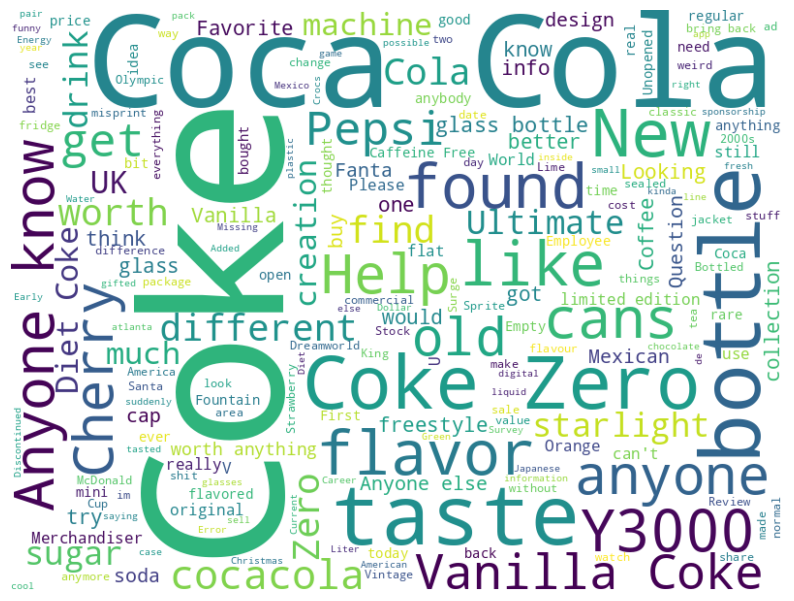

In [20]:
# Concatenate all text from the 'title' column into a single string
all_text = ' '.join(posts_df['title'])

# Create a WordCloud object
wordcloud = WordCloud(stopwords=set(stopwords.words('english')),
                      background_color='white',
                      width=800, height=600).generate(all_text)

# Display the generated WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

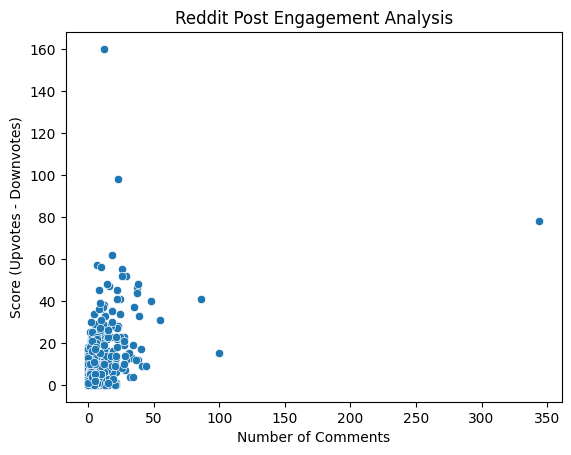

In [21]:
#Engagement Analysis
sns.scatterplot(x='num_comments', y='score', data=posts_df)
plt.title('Reddit Post Engagement Analysis')
plt.xlabel('Number of Comments')
plt.ylabel('Score (Upvotes - Downvotes)')
plt.show()

In [22]:
# Calculate Readability Scores
posts_df['flesch_reading_ease'] = posts_df['title'].apply(textstat.flesch_reading_ease)
posts_df['flesch_kincaid_grade'] = posts_df['title'].apply(textstat.flesch_kincaid_grade)

# Correlation Analysis
correlation_reading_ease = posts_df['flesch_reading_ease'].corr(posts_df['ups'])
correlation_kincaid_grade = posts_df['flesch_kincaid_grade'].corr(posts_df['ups'])

print("Correlation between Flesch Reading Ease and Upvotes:", correlation_reading_ease)
print("Correlation between Flesch-Kincaid Grade Level and Upvotes:", correlation_kincaid_grade)

# For a more detailed analysis, consider visualizations and additional statistical tests.

Correlation between Flesch Reading Ease and Upvotes: 0.013064945944132824
Correlation between Flesch-Kincaid Grade Level and Upvotes: -0.023020406762761108


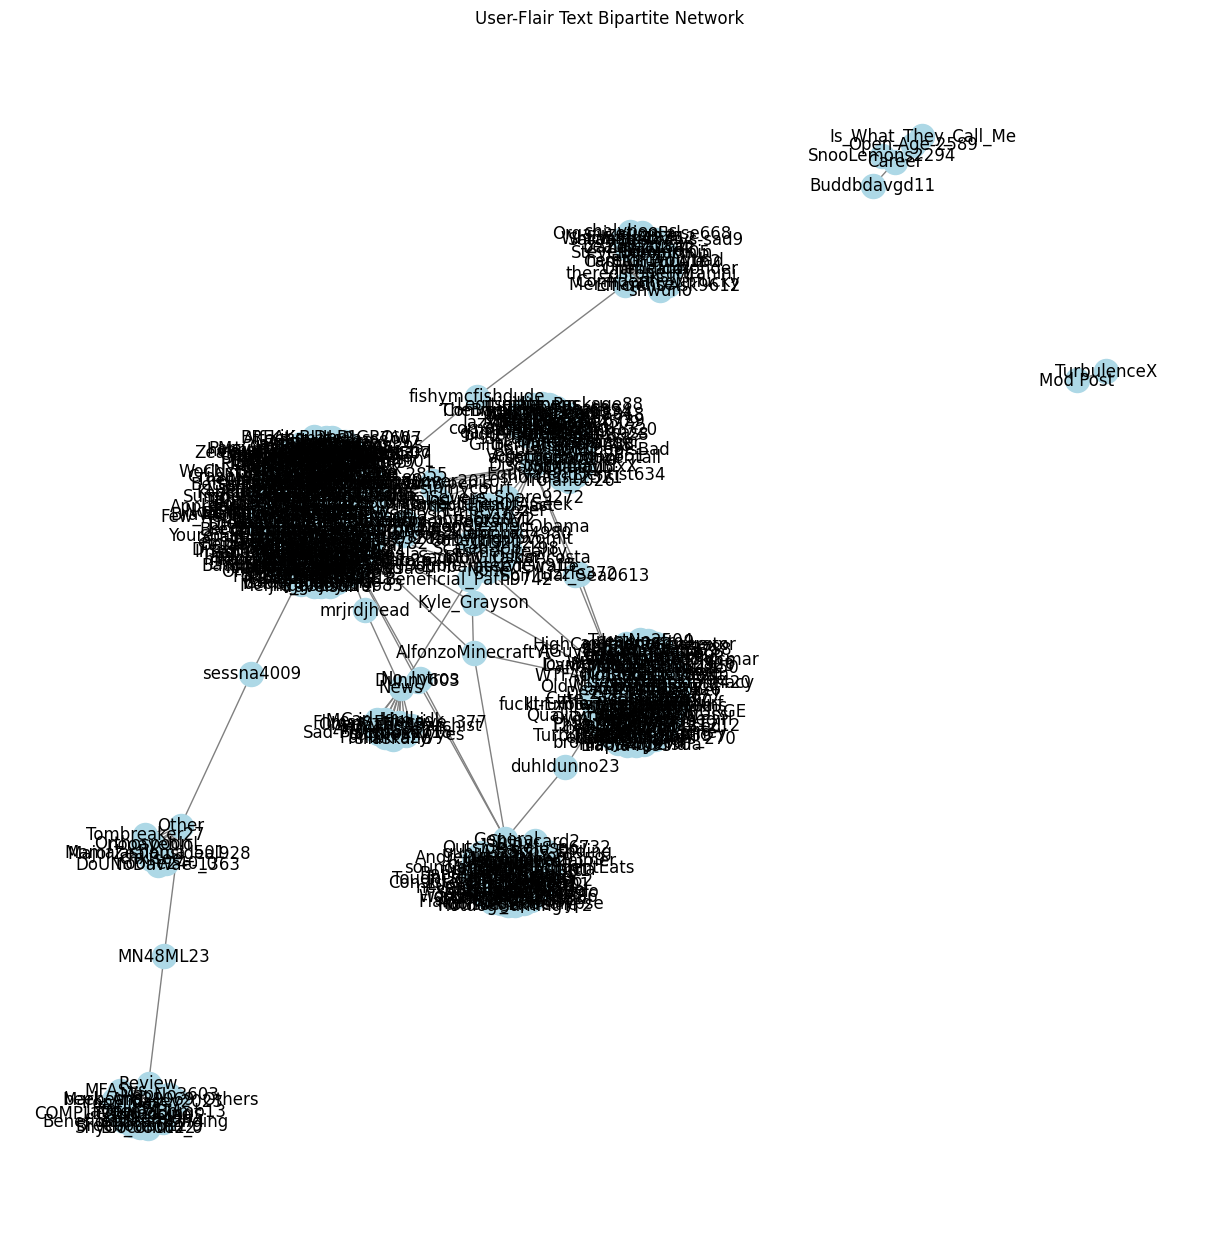

In [25]:
# Replace None values with a placeholder in the DataFrame
posts_df['link_flair_text'] = posts_df['link_flair_text'].fillna('N/A')

# Create a new graph
G = nx.Graph()

# Add nodes for each user and flair text
users = set(posts_df['author'])
flair_texts = set(posts_df['link_flair_text'])

G.add_nodes_from(users, bipartite=0)  # Users
G.add_nodes_from(flair_texts, bipartite=1)  # Flair texts

# Add edges based on user interactions with flair texts
for _, row in posts_df.iterrows():
    G.add_edge(row['author'], row['link_flair_text'])

# Visualization (basic)
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title('User-Flair Text Bipartite Network')
plt.show()

In [27]:
!pip install pyvis

from pyvis.network import Network
import networkx as nx

# Assuming 'G' is your existing networkx graph
G = nx.Graph()

# Create a PyVis network graph from the NetworkX graph
net = Network(notebook=True, height="750px", width="100%")
net.from_nx(G)  # Use 'G' instead of 'subgraph'

# Set the physics layout of the network
net.toggle_physics(True)

# Display the network
net.show("example.html")

example.html


In [28]:
! pip install python-louvain

In [32]:
# Replace None values with a placeholder in the DataFrame
posts_df['link_flair_text'] = posts_df['link_flair_text'].fillna('N/A')

# Create a new graph
G = nx.Graph()

# Add nodes for each user and flair text
users = set(posts_df['author'])
flair_texts = set(posts_df['link_flair_text'])

G.add_nodes_from(users, bipartite=0)  # Users
G.add_nodes_from(flair_texts, bipartite=1)  # Flair texts

# Check if 'G' is non-empty
if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    print("Error: Graph is empty.")
else:
    # Compute the best partition (community detection)
    partition = community_louvain.best_partition(G)

    # Check if communities are detected
    if len(set(partition.values())) == 1:
        print("Warning: Only one community detected.")

    # Create a color map for visualizing different communities
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

    # Draw the network
    plt.figure(figsize=(20, 20))
    pos = nx.spring_layout(G, k=0.1, iterations=20)
    for com in set(partition.values()):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size=20, node_color=cmap(com))

    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

Error: Graph is empty.


In [33]:
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

ValueError: max() arg is an empty sequence

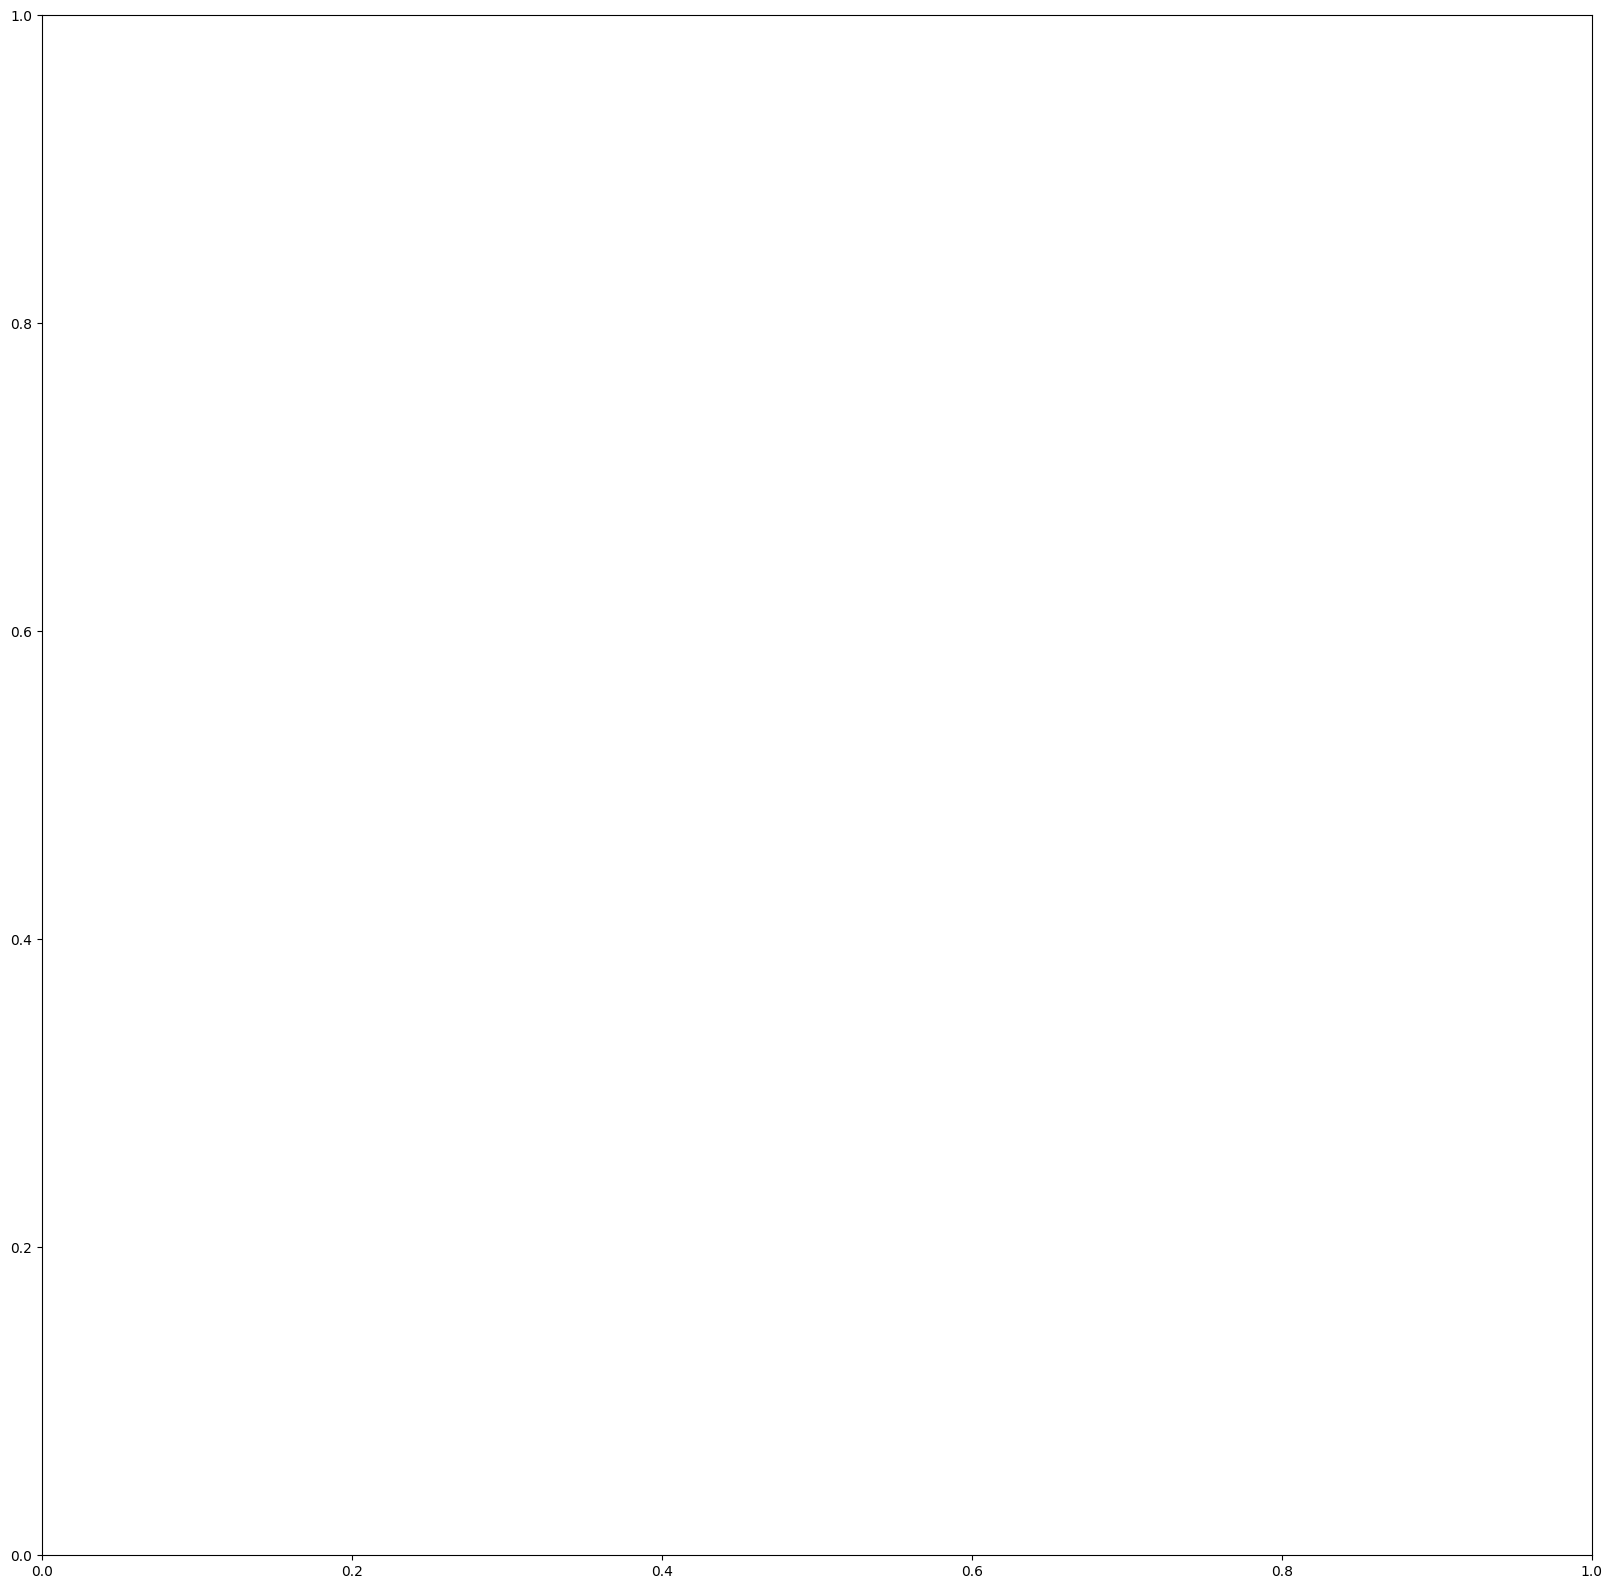

In [34]:
# Draw the network with colors
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.1, iterations=20)

# Draw nodes with colors according to their partition (community)
for node, community in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=100,
                           node_color=[cmap.colors[community]])

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

<ipython-input-35-66472ae86c51>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', number_of_communities)
/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


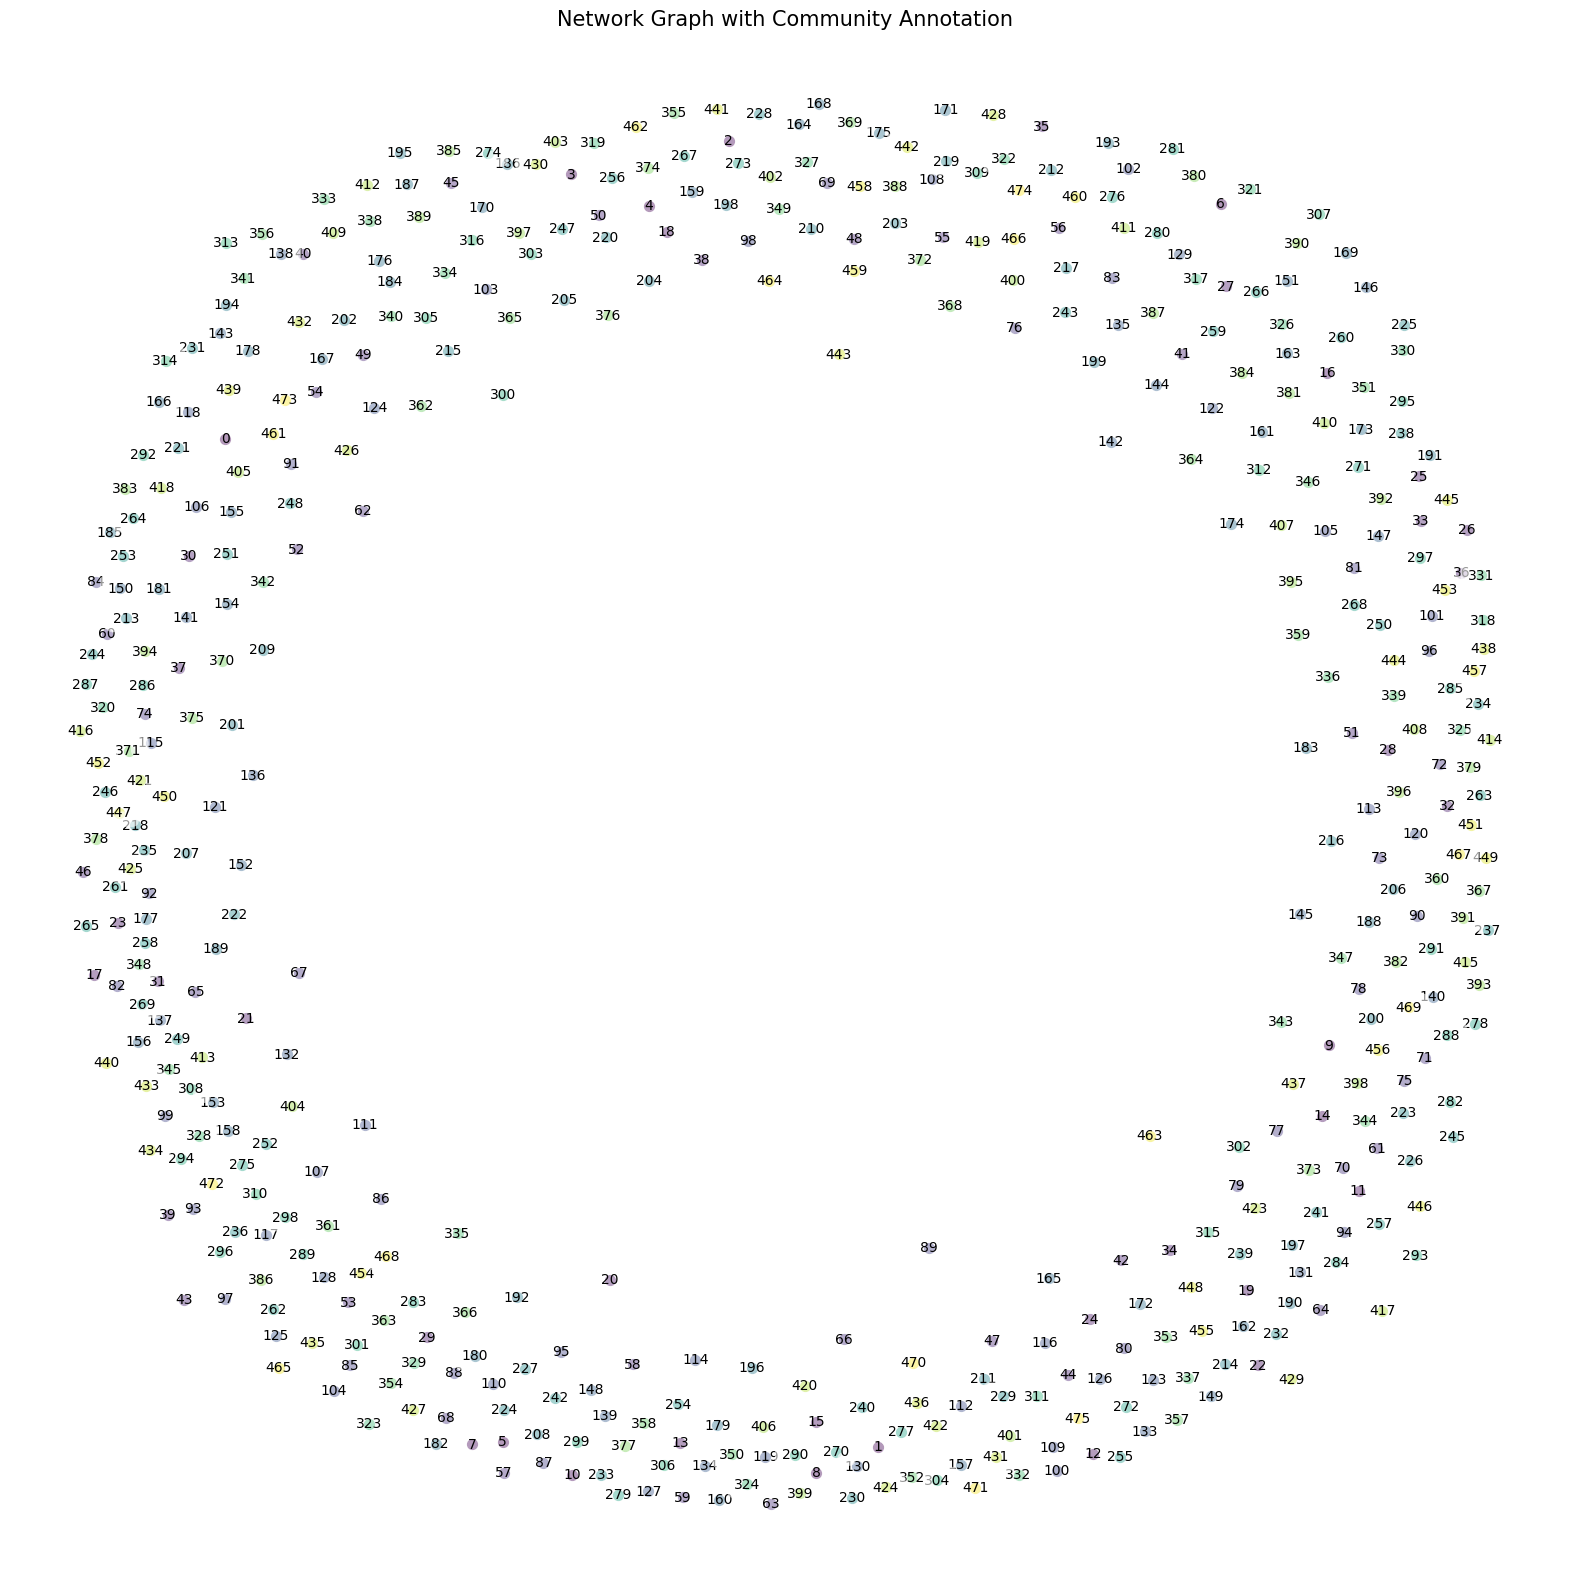

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from community import community_louvain

# Assuming 'G' is your existing networkx graph

# Compute the best partition (community detection)
partition = community_louvain.best_partition(G)

# Creating a color map for the communities
number_of_communities = max(partition.values()) + 1
cmap = cm.get_cmap('viridis', number_of_communities)

# Map each community to a distinct color
community_color = {community: cmap(i / number_of_communities) for i, community in enumerate(set(partition.values()))}

# Draw the network
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.1, iterations=20)

# Draw the nodes with assigned community colors
for community, color in community_color.items():
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == community]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=50, node_color=color)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Annotate the graph with community numbers
for community in set(partition.values()):
    # Find a central node in each community to place the community label
    community_nodes = [nodes for nodes in partition.keys() if partition[nodes] == community]
    # You could use different centrality measures to find the best node for labeling
    # Here we use the degree centrality
    central_node = max(community_nodes, key=lambda node: nx.degree(G, node))
    plt.text(pos[central_node][0], pos[central_node][1], str(community),
             size=10, horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.5'))

# Set the title and show the plot
plt.title('Network Graph with Community Annotation', size=15)
plt.axis('off')
plt.show()


In [36]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

posts_df['sentiment_polarity'] = posts_df['title'].apply(calculate_sentiment)  # or 'body' if you prefer

In [37]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

posts_df['sentiment'] = posts_df['sentiment_polarity'].apply(categorize_sentiment)


In [38]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

posts_df['sentiment'] = posts_df['sentiment_polarity'].apply(categorize_sentiment)


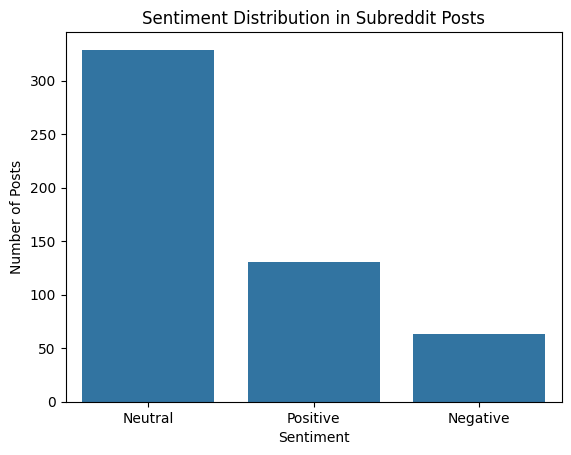

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = posts_df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution in Subreddit Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()


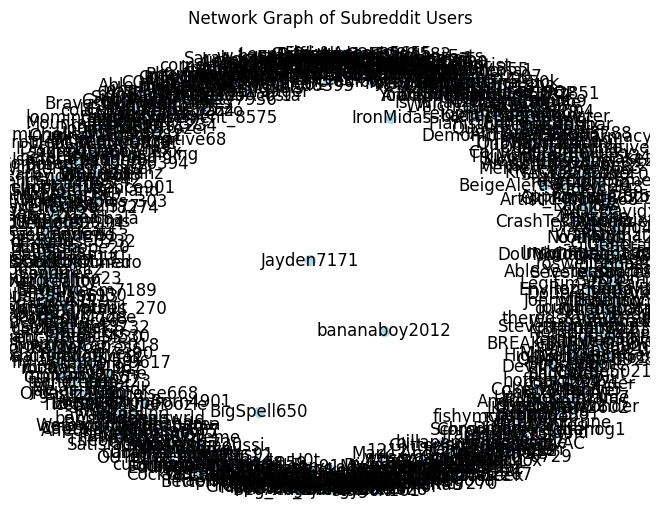

In [40]:
import networkx as nx

# Assuming you have a network graph G created from the subreddit data
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, node_color='lightblue', edge_color='gray')
plt.title('Network Graph of Subreddit Users')
plt.show()
